In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as PathEffects

In [ ]:
import pandas as pd

data1 = pd.read_csv("prabowo-1.csv")
data2 = pd.read_csv("prabowo-2.csv")
data3 = pd.read_csv("prabowo-3.csv")
data4 = pd.read_csv("prabowo-4.csv")

df = pd.concat([data1, data2, data3, data4], ignore_index=True)

**Eksplorasi Data**

In [ ]:
total_rows = len(df)
print(f"Total jumlah baris dalam dataset: {total_rows}")

Total jumlah baris dalam dataset: 9056


In [ ]:
df.head()

conversation_id_str                      created_at  favorite_count  \
0  1903865514310664621  Sun Mar 23 17:44:45 +0000 2025               0   
1  1903865458123755674  Sun Mar 23 17:44:31 +0000 2025               0   
2  1903863218319278449  Sun Mar 23 17:44:27 +0000 2025               0   
3  1903711938460422285  Sun Mar 23 17:44:24 +0000 2025               0   
4  1903151942798545149  Sun Mar 23 17:44:03 +0000 2025               0   

                                           full_text               id_str  \
0  Prabowo dan anak Presiden RI terdahulu rayakan...  1903865514310664621   
1  Eh akun yg countdown matinya prabowo udh ilang...  1903865458123755674   
2  @msaid_didu @prabowo Di kasih masukan n ide2 b...  1903865440256086174   
3  @Dyananjani89 @ardi_tama1 @BocorAlusPol Dari d...  1903865425097834779   
4  @halukinasi ngakak bro pikir dukung prabowo tp...  1903865339961901501   

                                         image_url in_reply_to_screen_name  \
0  https://pbs.twimg.com/media/Gmvjj9qbUAAieJV.png                     NaN   
1                                              NaN                     NaN   
2                                              NaN              msaid_didu   
3                                              NaN            Dyananjani89   
4                                              NaN              halukinasi   

  lang        location  quote_count  reply_count  retweet_count  \
0   in       Indonesia            0            0              0   
1   in             NaN            0            0              0   
2   in             NaN            0            0              0   
3   in  Gyrus confusii            0            0              0   
4   in             NaN            0            0              0   

                                           tweet_url          user_id_str  \
0  https://x.com/webelshinta/status/1903865514310...  1482999200988434435   
1  https://x.com/wongbijakasli/status/19038654581...  1566360618235351041   
2  https://x.com/abora3530/status/190386544025608...  1833866663533715457   
3  https://x.com/Carbaroxabane/status/19038654250...  1645820726187012097   
4  https://x.com/bengkoangrujak/status/1903865339...  1090341301948542976   

         username  
0     webelshinta  
1   wongbijakasli  
2       abora3530  
3   Carbaroxabane  
4  bengkoangrujak

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9056 entries, 0 to 9055
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      9056 non-null   int64 
 1   created_at               9056 non-null   object
 2   favorite_count           9056 non-null   int64 
 3   full_text                9056 non-null   object
 4   id_str                   9056 non-null   int64 
 5   image_url                1500 non-null   object
 6   in_reply_to_screen_name  6063 non-null   object
 7   lang                     9056 non-null   object
 8   location                 3399 non-null   object
 9   quote_count              9056 non-null   int64 
 10  reply_count              9056 non-null   int64 
 11  retweet_count            9056 non-null   int64 
 12  tweet_url                9056 non-null   object
 13  user_id_str              9056 non-null   int64 
 14  username                 9056 non-null  

In [ ]:
df.describe()

conversation_id_str  favorite_count        id_str  quote_count  \
count         9.056000e+03     9056.000000  9.056000e+03  9056.000000   
mean          1.899487e+18       50.913980  1.900791e+18     0.728136   
std           3.897797e+16     1075.616611  3.832235e+15    19.429786   
min           1.207674e+17        0.000000  1.878058e+18     0.000000   
25%           1.896468e+18        0.000000  1.896491e+18     0.000000   
50%           1.903238e+18        0.000000  1.903562e+18     0.000000   
75%           1.903641e+18        0.000000  1.903761e+18     0.000000   
max           1.913094e+18    51905.000000  1.913106e+18  1387.000000   

       reply_count  retweet_count   user_id_str  
count  9056.000000    9056.000000  9.056000e+03  
mean      1.092094      12.282354  1.223663e+18  
std      15.270299     323.772742  6.652044e+17  
min       0.000000       0.000000  9.688522e+06  
25%       0.000000       0.000000  9.838006e+17  
50%       0.000000       0.000000  1.515592e+18  
75%       0.000000       0.000000  1.701118e+18  
max     645.000000   19788.000000  1.896941e+18

In [ ]:
print(df.isnull().sum())

conversation_id_str           0
created_at                    0
favorite_count                0
full_text                     0
id_str                        0
image_url                  7556
in_reply_to_screen_name    2993
lang                          0
location                   5657
quote_count                   0
reply_count                   0
retweet_count                 0
tweet_url                     0
user_id_str                   0
username                      0
dtype: int64


In [ ]:
df[df.in_reply_to_screen_name.isna()]

conversation_id_str                      created_at  favorite_count  \
0     1903865514310664621  Sun Mar 23 17:44:45 +0000 2025               0   
1     1903865458123755674  Sun Mar 23 17:44:31 +0000 2025               0   
5     1903865322991735050  Sun Mar 23 17:43:59 +0000 2025               0   
7     1903865226652742069  Sun Mar 23 17:43:36 +0000 2025               0   
13    1903864989942980670  Sun Mar 23 17:42:40 +0000 2025               0   
...                   ...                             ...             ...   
8918  1912797508117647525  Thu Apr 17 09:17:18 +0000 2025              82   
8926  1899235396174889437  Mon Mar 10 23:06:19 +0000 2025            1118   
8927  1887482083255222746  Thu Feb 06 12:42:51 +0000 2025             290   
8957  1910896800552136958  Sat Apr 12 03:24:34 +0000 2025               1   
8998  1905355041336177021  Thu Mar 27 20:23:36 +0000 2025               8   

                                              full_text               id_str  \
0     Prabowo dan anak Presiden RI terdahulu rayakan...  1903865514310664621   
1     Eh akun yg countdown matinya prabowo udh ilang...  1903865458123755674   
5     yg bikin aku ngomong kontol di dunia ini cuma ...  1903865322991735050   
7      gausah salahin prabowo salahin antek anteknya...  1903865226652742069   
13                                Anjeng orgil @prabowo  1903864989942980670   
...                                                 ...                  ...   
8918  Saat dunia sedang tidak baik2 saja Allah memil...  1912797508117647525   
8926  PRABOWO HANYA PINTER OMON OMON SAJA. MANA GAK ...  1899235396174889437   
8927  Hati2 kode KERAS Presiden @prabowo kpd siapapu...  1887482083255222746   
8957  Prabowo ni sudah dibilang kalau punya trauma 9...  1910896800552136958   
8998  Don't raise taxes on American energy! E2 agree...  1905355041336177021   

                                              image_url  \
0       https://pbs.twimg.com/media/Gmvjj9qbUAAieJV.png   
1                                                   NaN   
5                                                   NaN   
7                                                   NaN   
13                                                  NaN   
...                                                 ...   
8918  https://pbs.twimg.com/ext_tw_video_thumb/19127...   
8926  https://pbs.twimg.com/ext_tw_video_thumb/18992...   
8927  https://pbs.twimg.com/ext_tw_video_thumb/18874...   
8957                                                NaN   
8998    https://pbs.twimg.com/media/GlXGQeYWEAAFDlX.png   

     in_reply_to_screen_name lang                location  quote_count  \
0                        NaN   in               Indonesia            0   
1                        NaN   in                     NaN            0   
5                        NaN   in                🌸🍶♡.⁺࿐˚･            0   
7                        NaN   in                 she/her            0   
13                       NaN   in                     NaN            0   
...                      ...  ...                     ...          ...   
8918                     NaN   in                     NaN            4   
8926                     NaN   in  Jabodetabek, Indonesia           16   
8927                     NaN   in                     NaN            7   
8957                     NaN   in                     NaN            0   
8998                     NaN   en          Washington, DC            0   

      reply_count  retweet_count  \
0               0              0   
1               0              0   
5               1              0   
7               0              0   
13              0              0   
...           ...            ...   
8918           74             26   
8926           52            460   
8927           91             58   
8957            0              0   
8998            0              0   

                                              tweet_url          user_id_str  \
0     htt

In [ ]:
print(df['in_reply_to_screen_name'].value_counts())

in_reply_to_screen_name
H4T14K4LN4L42      260
prabowo            219
BANGSAygSUJUD      129
agathadew_         115
ayundhaqh          110
                  ... 
valverdae            1
Jawalari1935         1
ikhtyrstwn           1
pancongmancur        1
humaniesproject      1
Name: count, Length: 1837, dtype: int64


**Data Cleaning**

In [ ]:
print("Sebelum data dibersihkan:", df.shape)

Sebelum data dibersihkan: (9056, 15)


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
df = df.dropna(subset=['in_reply_to_screen_name'])
df = df[df['username'] != df['in_reply_to_screen_name']]

In [ ]:
# Drop rows dengan username atau in_reply_to yang 'NaN' string
df_clean = df[
    (df['username'].str.lower() != 'nan') &
    (df['in_reply_to_screen_name'].str.lower() != 'nan')
]

# Buat graph dari data bersih
G = nx.DiGraph()
G.add_edges_from(zip(df_clean['username'], df_clean['in_reply_to_screen_name']))

print(f"Jumlah node dalam graph: {G.number_of_nodes()}")
print(f"Jumlah edge dalam graph: {G.number_of_edges()}")

Jumlah node dalam graph: 5941
Jumlah edge dalam graph: 5540


In [ ]:
print("Sesudah data dibersihkan:", df.shape)

Sesudah data dibersihkan: (5839, 15)


## Menghitung Closeness Centrality

In [ ]:
closeness_centrality = nx.closeness_centrality(G)

In [ ]:
closeness_df = pd.DataFrame(closeness_centrality.items(), columns=['Person', 'Closeness Centrality'])
print(closeness_df)

               Person  Closeness Centrality
0           abora3530              0.000000
1          msaid_didu              0.005621
2       Carbaroxabane              0.000000
3        Dyananjani89              0.000168
4      bengkoangrujak              0.000000
...               ...                   ...
5936      lacheriebon              0.000000
5937        herry_s77              0.000000
5938           bbieyu              0.000000
5939       mbr_rss125              0.000000
5940  txtdariordebaru              0.000000

[5941 rows x 2 columns]


**Menampilkan 10 Orang Teratas**

In [ ]:
top_10_df = closeness_df.sort_values(by='Closeness Centrality', ascending=False).head(10)
top_10_nodes = top_10_df['Person'].tolist()
top1_node = top_10_nodes[0]

print("10 Orang Teratas Berdasarkan Closeness Centrality:")
print(top_10_df)

10 Orang Teratas Berdasarkan Closeness Centrality:
               Person  Closeness Centrality
38            prabowo              0.033667
29      H4T14K4LN4L42              0.022824
4942       agathadew_              0.019360
5243        ayundhaqh              0.018519
193     BANGSAygSUJUD              0.016196
250   susipudjiastuti              0.015664
165          moisehll              0.015152
296          BosPurwa              0.014389
923         Piyusaja2              0.014360
5838      arman_dhani              0.014310


Visualisasi Graf

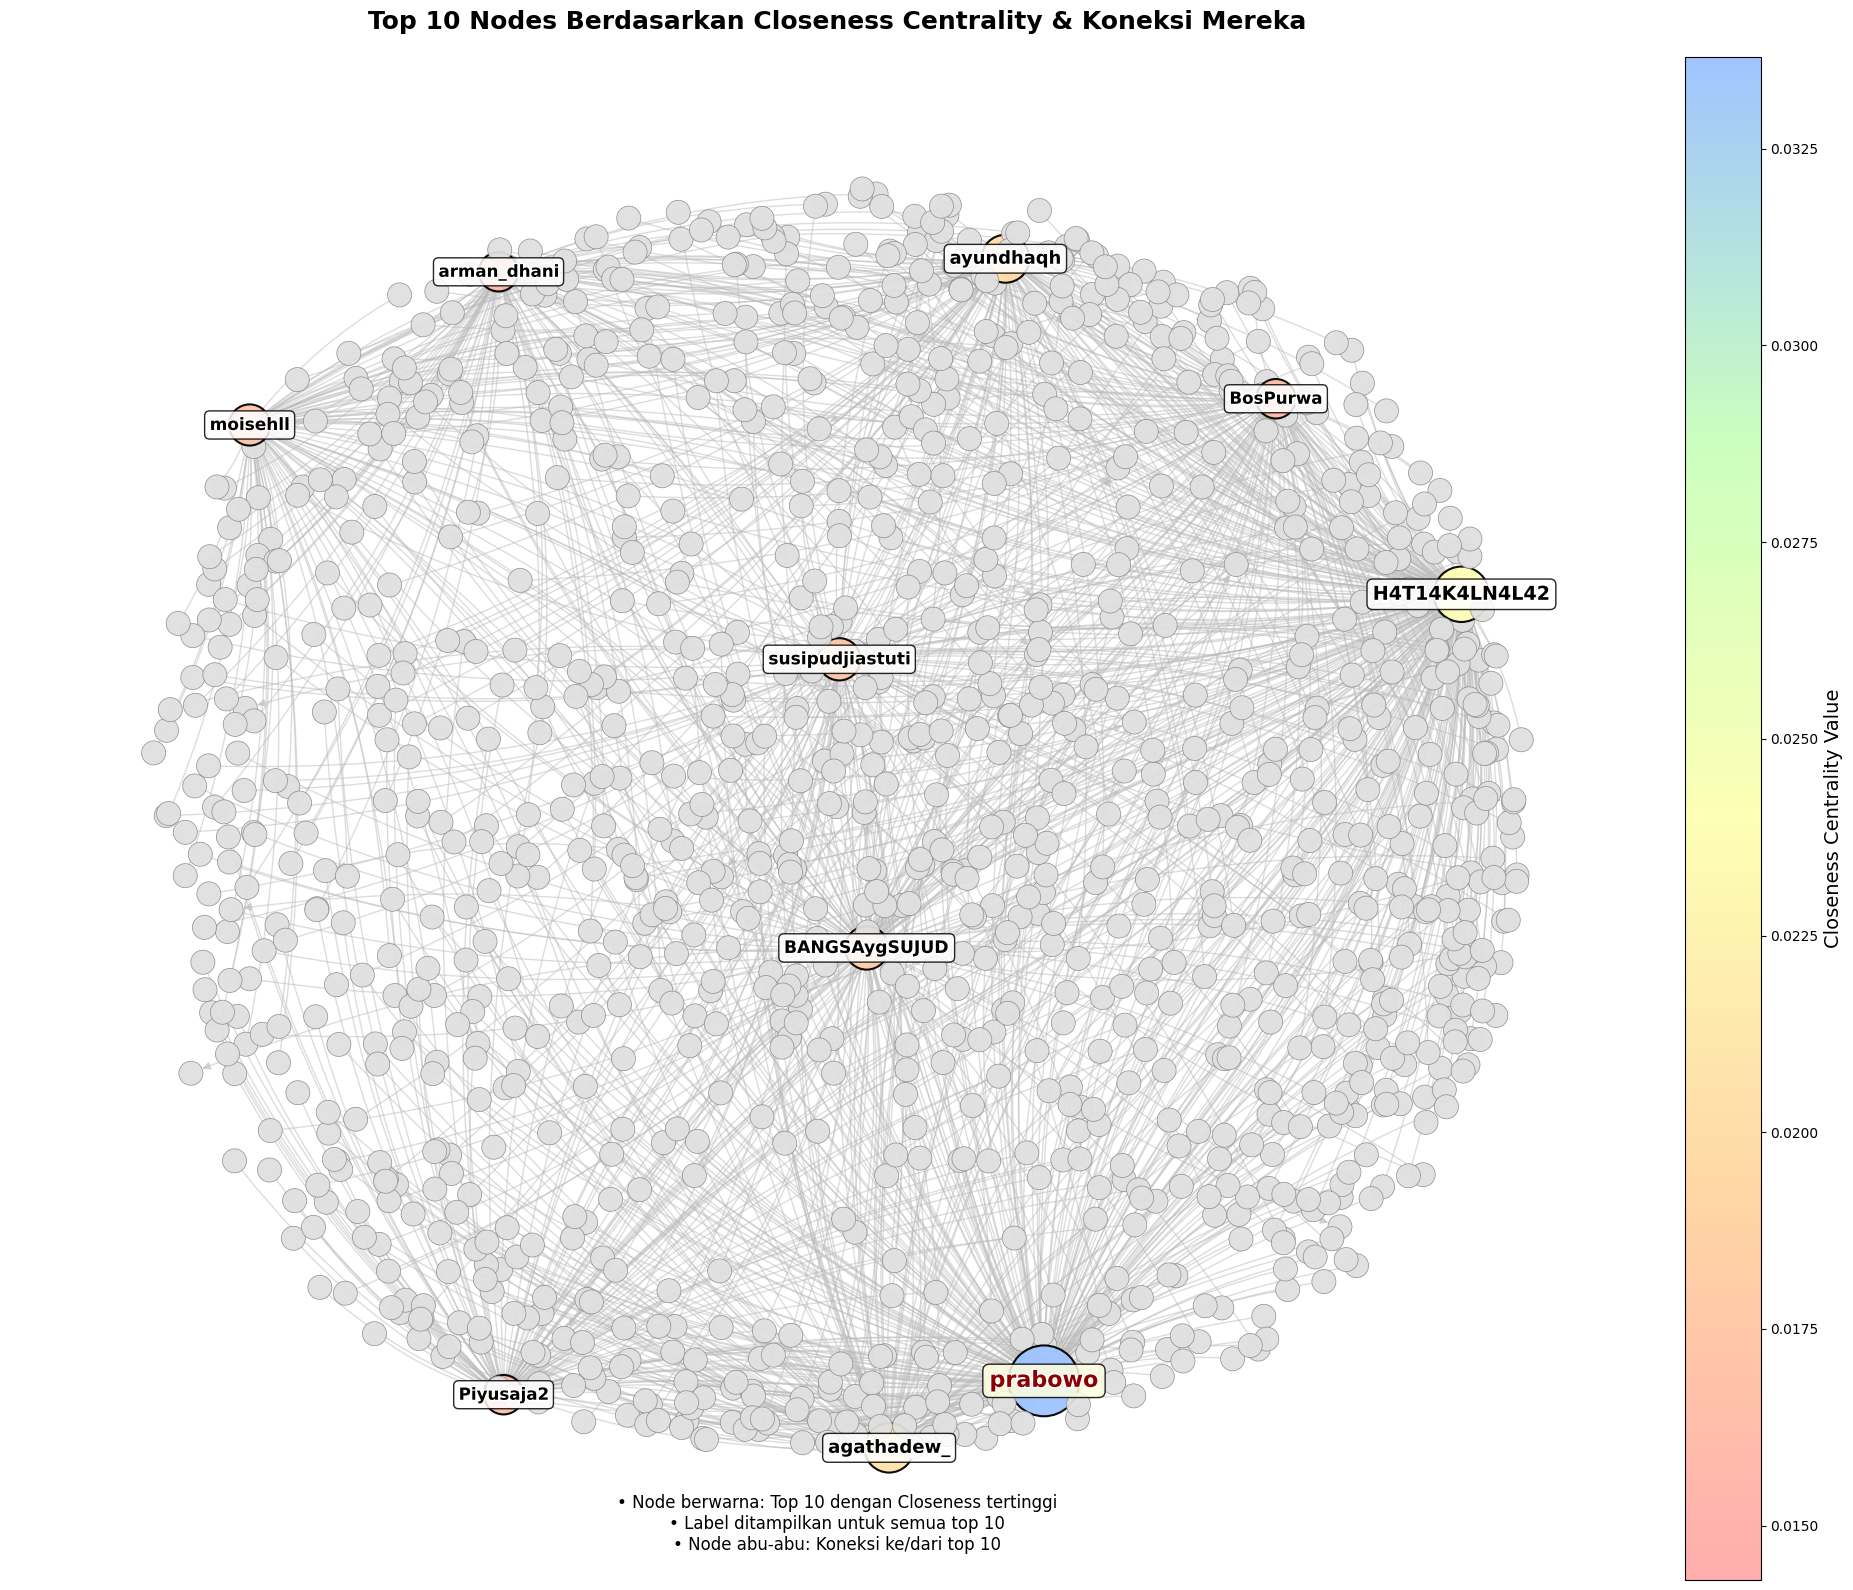

In [ ]:
expanded_nodes = set(top_10_nodes)
for node in top_10_nodes:
    expanded_nodes.update(G.successors(node))
    expanded_nodes.update(G.predecessors(node))

subgraph = G.subgraph(expanded_nodes)
pos = nx.spring_layout(subgraph, k=0.3, iterations=50, seed=42)
pastel_cmap = LinearSegmentedColormap.from_list('pastel',
    ['#ffadad', '#ffd6a5', '#fdffb6', '#caffbf', '#a0c4ff'], N=256)

min_centrality = top_10_df['Closeness Centrality'].min()
max_centrality = top_10_df['Closeness Centrality'].max()

# Size & Color Node
node_sizes, node_colors = [], []
for node in subgraph.nodes():
    if node in top_10_nodes:
        norm = (closeness_centrality[node] - min_centrality) / (max_centrality - min_centrality + 1e-9)
        node_sizes.append(800 + 1800 * norm)
        node_colors.append(pastel_cmap(0.1 + 0.9 * norm))
    else:
        node_sizes.append(300)
        node_colors.append("#E0E0E0")
edges_internal = [(u, v) for u, v in subgraph.edges() if u in top_10_nodes and v in top_10_nodes]
edges_external = [(u, v) for u, v in subgraph.edges() if u not in top_10_nodes or v not in top_10_nodes]
fig, ax = plt.subplots(figsize=(20, 16))
nx.draw_networkx_edges(subgraph, pos, edgelist=edges_external, edge_color='#BBBBBB', alpha=0.5, width=1.0,
                       arrows=True, arrowstyle='-|>', arrowsize=12, connectionstyle='arc3,rad=0.1', ax=ax)
nx.draw_networkx_edges(subgraph, pos, edgelist=edges_internal, edge_color='#333333', alpha=0.8, width=2.0,
                       arrows=True, arrowstyle='-|>', arrowsize=20, connectionstyle='arc3,rad=0.15', ax=ax)
nx.draw_networkx_nodes(
    subgraph, pos,
    node_size=node_sizes,
    node_color=node_colors,
    edgecolors=['black' if n in top_10_nodes else '#888888' for n in subgraph.nodes()],
    linewidths=[1.5 if n in top_10_nodes else 0.5 for n in subgraph.nodes()],
    alpha=0.95, ax=ax
)
for node in top_10_nodes:
    x, y = pos[node]
    norm = (closeness_centrality[node] - min_centrality) / (max_centrality - min_centrality + 1e-9)
    fontsize = 12 + 4 * norm
    color = 'darkred' if node == top_10_nodes[0] else 'black'
    bbox = dict(boxstyle="round,pad=0.3", facecolor='lightyellow' if node == top_10_nodes[0] else 'white', edgecolor='black', alpha=0.85)
    text = ax.text(x, y, node,
                   fontsize=fontsize,
                   color=color,
                   fontweight='bold',
                   ha='center', va='center',
                   bbox=bbox)
    text.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='white')])

sm = plt.cm.ScalarMappable(cmap=pastel_cmap, norm=plt.Normalize(vmin=min_centrality, vmax=max_centrality))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.01)
cbar.set_label('Closeness Centrality Value', fontsize=14, color='black')
cbar.ax.yaxis.set_tick_params(color='black')
cbar.outline.set_edgecolor('black')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='black')
ax.set_title("Top 10 Nodes Berdasarkan Closeness Centrality & Koneksi Mereka", fontsize=18, color='black', fontweight='bold', pad=20)
ax.text(0.5, 0.02,
        "• Node berwarna: Top 10 dengan Closeness tertinggi\n• Label ditampilkan untuk semua top 10\n• Node abu-abu: Koneksi ke/dari top 10",
        horizontalalignment='center', color='black', transform=ax.transAxes, fontsize=12)

ax.axis('off')
plt.tight_layout()
plt.show()

Statistik Closeness Centrality:
  • Min (Node Terhubung)    : 0.0001204094
  • Max (Node Terhubung)    : 0.3407414556
  • Rata‑rata (Terhubung)   : 0.0008
  • Jumlah Node Terisolasi  : 6601
  • Jumlah Node Terhubung   : 1705


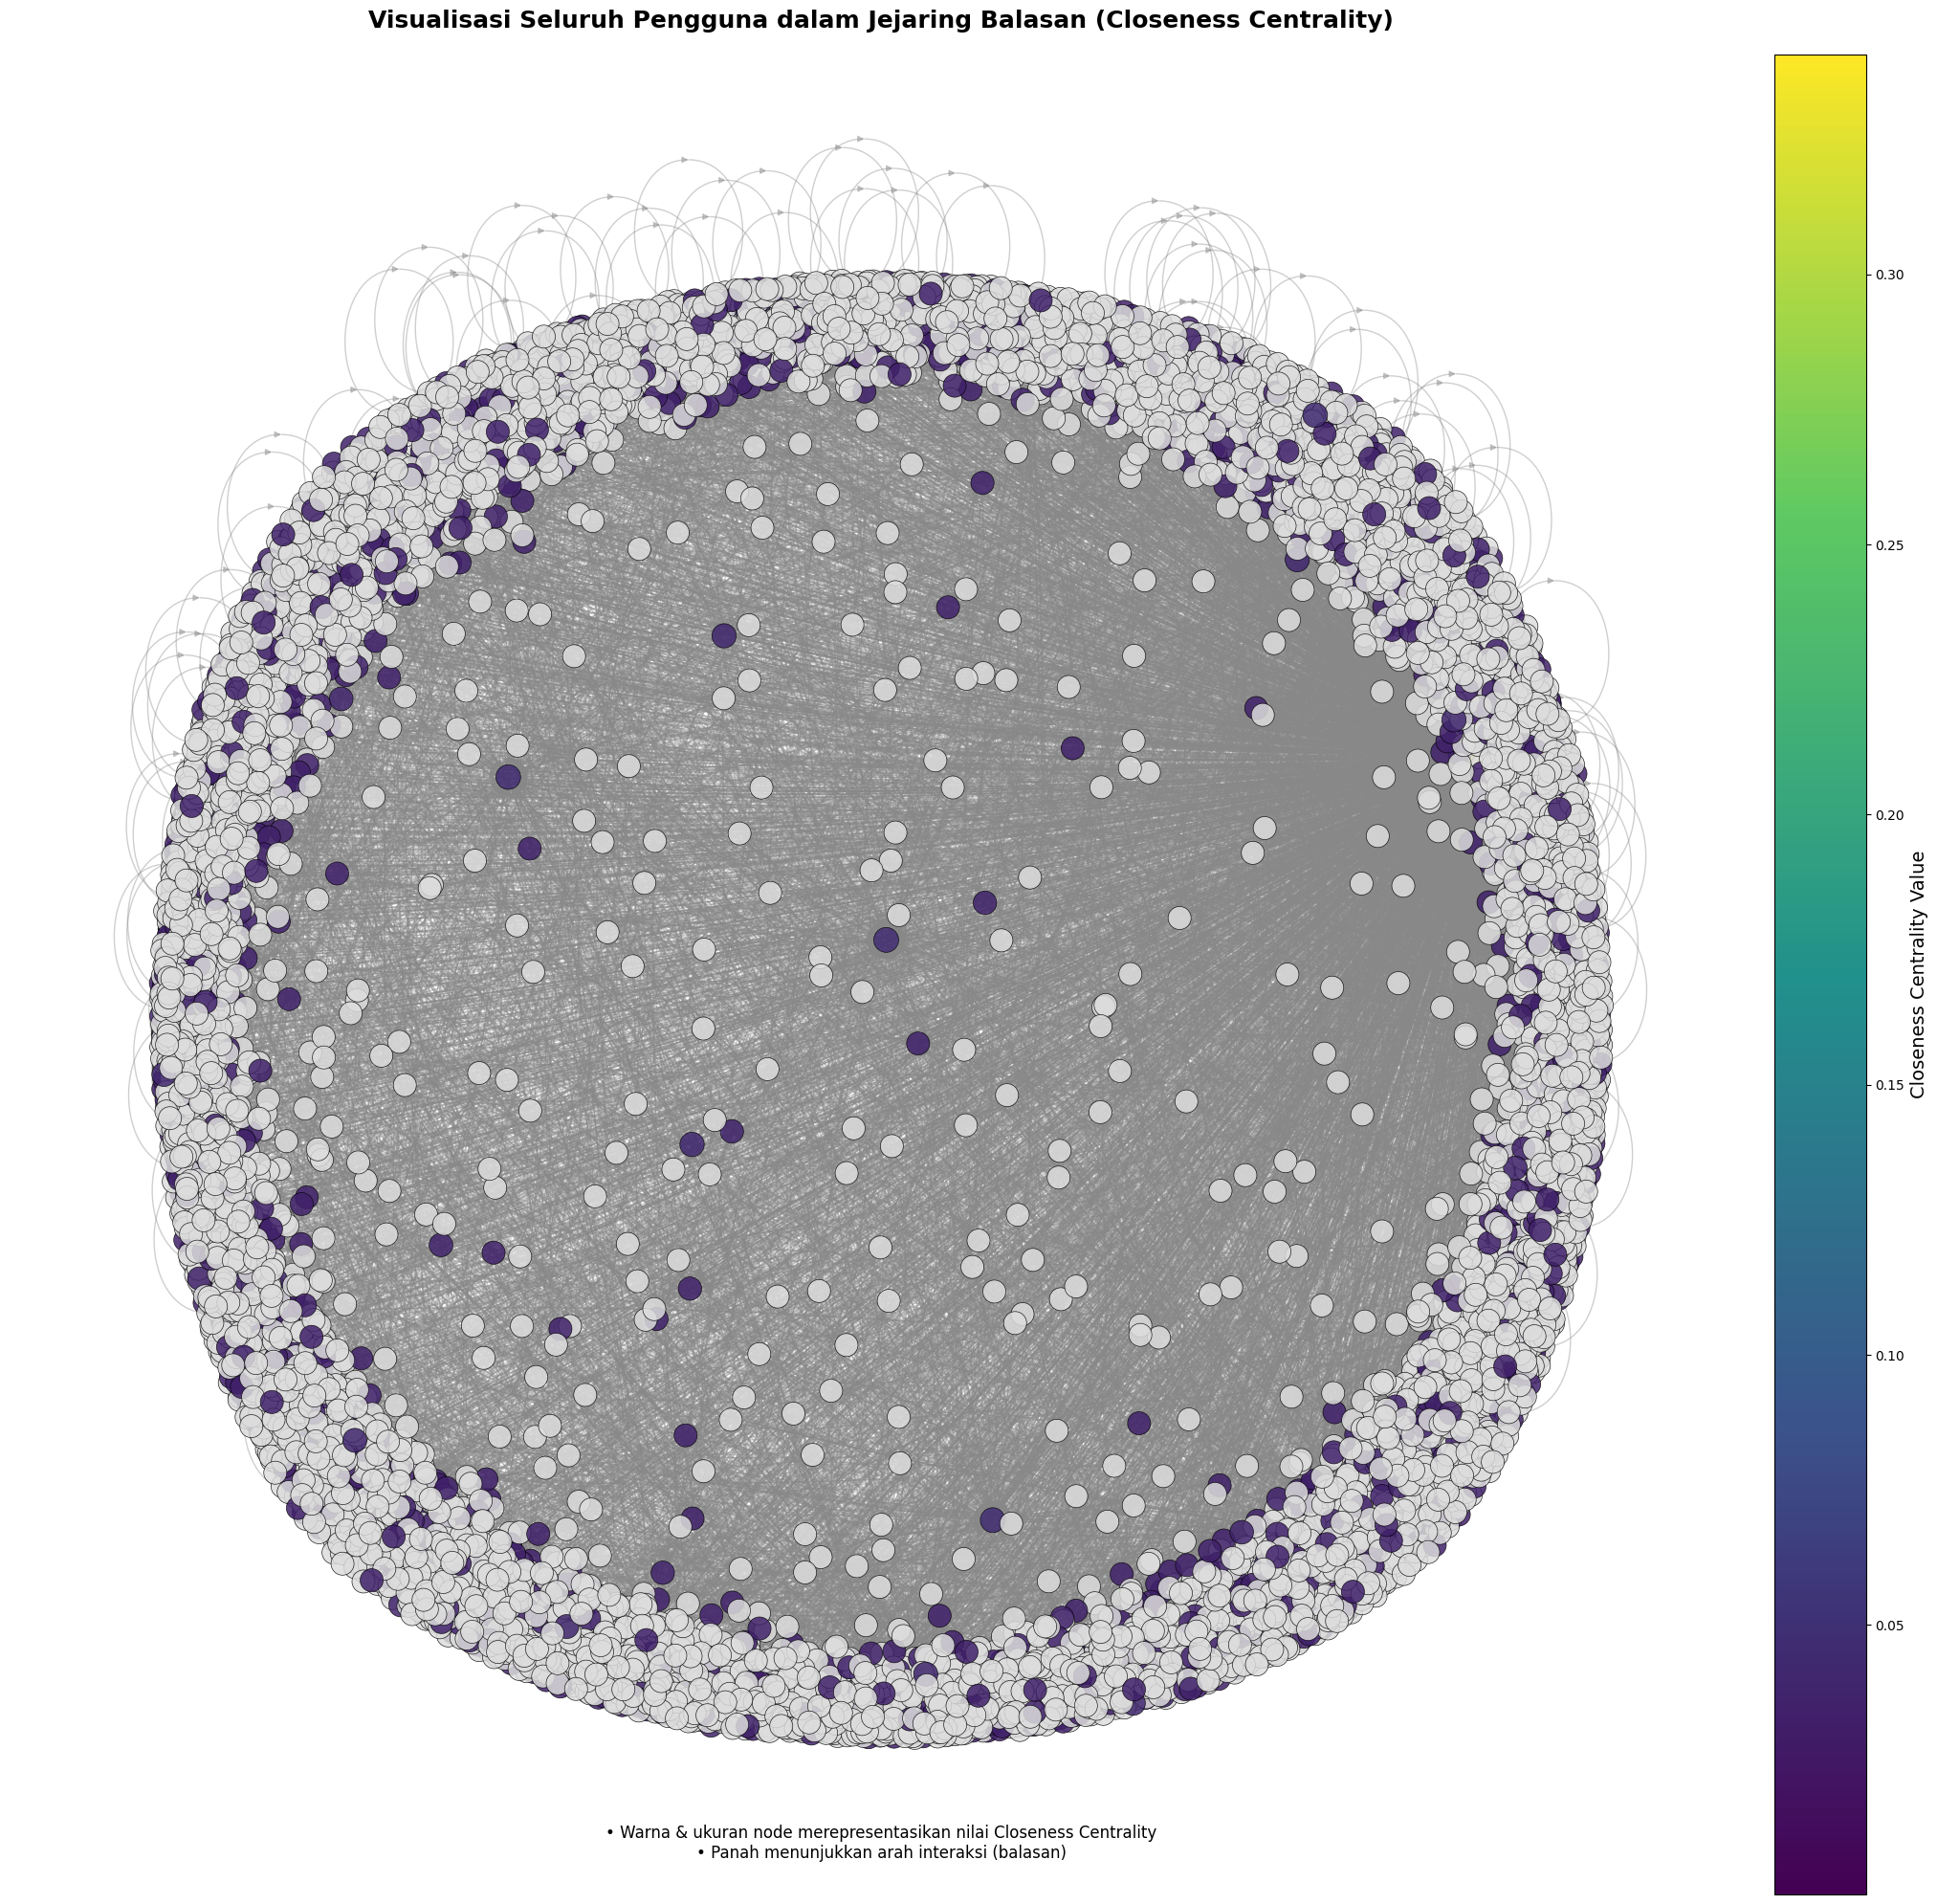

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load dataset
data1 = pd.read_csv("prabowo-1.csv")
data2 = pd.read_csv("prabowo-2.csv")
data3 = pd.read_csv("prabowo-3.csv")
data4 = pd.read_csv("prabowo-4.csv")

df = pd.concat([data1, data2, data3, data4], ignore_index=True)
df.columns = df.columns.str.lower()

# Create graph
G = nx.DiGraph()
G.add_edges_from(zip(df['username'], df['in_reply_to_screen_name']))

# Hitung Closeness Centrality
closeness = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness.items(), columns=['Node', 'Closeness'])

# Ambil data yang terhubung
connected = closeness_df[closeness_df['Closeness'] > 0]
min_closeness = connected['Closeness'].min()
max_closeness = connected['Closeness'].max()
avg_closeness = connected['Closeness'].mean()
isolated_count = len(closeness_df[closeness_df['Closeness'] == 0])
connected_count = len(connected)

print("Statistik Closeness Centrality:")
print(f"  • Min (Node Terhubung)    : {min_closeness:.10f}")
print(f"  • Max (Node Terhubung)    : {max_closeness:.10f}")
print(f"  • Rata‑rata (Terhubung)   : {avg_closeness:.4f}")
print(f"  • Jumlah Node Terisolasi  : {isolated_count}")
print(f"  • Jumlah Node Terhubung   : {connected_count}")

# Layout
pos = nx.spring_layout(G, k=0.5, iterations=50, seed=42)

# Custom colormap
custom_cmap = LinearSegmentedColormap.from_list('custom_viridis',
                                                ['#440154', '#3b528b', '#21918c', '#5ec962', '#fde725'],
                                                N=256)

# Node size & color berdasarkan closeness centrality
node_sizes = []
node_colors = []
for node in G.nodes():
    closeness_value = closeness.get(node, 0)
    norm = (closeness_value - min_closeness) / (max_closeness - min_closeness) if max_closeness > min_closeness else 0
    node_sizes.append(300 + 1500 * norm)
    node_colors.append(custom_cmap(0.1 + 0.9 * norm) if closeness_value > 0 else '#DDDDDD')

# Plot
fig, ax = plt.subplots(figsize=(22, 20))

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.4, edge_color="#888888", arrows=True,
                       arrowstyle='-|>', arrowsize=10, connectionstyle='arc3,rad=0.05', ax=ax)

# Draw nodes
nx.draw_networkx_nodes(G, pos,
                       node_size=node_sizes,
                       node_color=node_colors,
                       edgecolors='black',
                       linewidths=0.5,
                       alpha=0.85, ax=ax)

# Draw labels (optional, only if nodes < 100, otherwise too crowded)
if len(G.nodes()) <= 100:
    nx.draw_networkx_labels(G, pos, font_size=9)

# Colorbar
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=plt.Normalize(vmin=min_closeness, vmax=max_closeness))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.01)
cbar.set_label('Closeness Centrality Value', fontsize=14, color='black')
cbar.ax.yaxis.set_tick_params(color='black')
cbar.outline.set_edgecolor('black')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='black')

# Judul & info
ax.set_title("Visualisasi Seluruh Pengguna dalam Jejaring Balasan (Closeness Centrality)", fontsize=18, fontweight='bold', pad=20)
ax.text(0.5, 0.02, "• Warna & ukuran node merepresentasikan nilai Closeness Centrality\n• Panah menunjukkan arah interaksi (balasan)",
        horizontalalignment='center', color='black', transform=ax.transAxes, fontsize=12)

ax.axis('off')
plt.tight_layout()
plt.show()
